# Clustering Evaluations Metrics

In unsupervised learning techniques, such as clustering, there is no reasonable way to measure how good our predictions are since we do not have any true labels to compare to our predictions.

For example, let's say you and your friend are in charge of clustering various restaurants together. You group restaurants based on the type of food that is served and your friend groups the restaurants based on ratings. Which of these clustering techniques is correct? Is there even a correct technique?

We kind of get around this by creating heuristic metrics to evaluate the clusters that allow us to compare models. It is important to consider working with Subject Matter Experts to confirm the results of your algorithm and think critically about decisions made as a result of your algorithm.

## Let's check this out in Python.

**Note**: A video walkthrough of this code is available at the end of the modele.

In [2]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Note**: In the code below we will only use 2 of the features for clustering. **This is not necessary**.

Generally, you would use many or all features for good clustering. Unfortunately, it can be difficult to visualize clusters of many features because they occupy higher dimensional space.

In [3]:
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [4]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

# Inertia

"Tightness" is a measure of how similar the data points in a given cluster are to the other data points in the same cluster. One way to evaluate the tightness of clusters is by using a plot of the *inertia* of different numbers of clusters (k values). The *inertia* of a clustering is determined by calculating the distance between each point and its cluster's centroid, squaring those distances, and summing the squares. This determines the 'tightness' of each cluster.

While tight clusters (indicated by a low inertia score) are desirable, the lowest inertia is not the best clustering. To understand why to consider that the inertia will always go down if we add more cluster. The more clusters, the lower the inertia score. To take this to the extreme, consider the maximum number of clusters: if each cluster only consisted of one data point, the inerita would be as low as possible. Having too many clusters is not useful and defeats the practical purpose of clustering in the first place. The best clustering is a balance between the lowest number of clusters and the lowest inertia.


### Elbow plot (Elbow method)

To find the best balance between the tightness of clusters and the number of clusters, we create a plot of the inertia for several choices of k (number of clusters) and look for the "elbow" in the graph. The elbow is the place where the dramatic reduction in inertia stats to level off. Fortunately for us KMeans stores the inertia of the clustering as an attribute we can directly access after the model is fitted.

The code below shows how to produce a plot of inertia vs. clusters:

Text(0, 0.5, 'inertia')

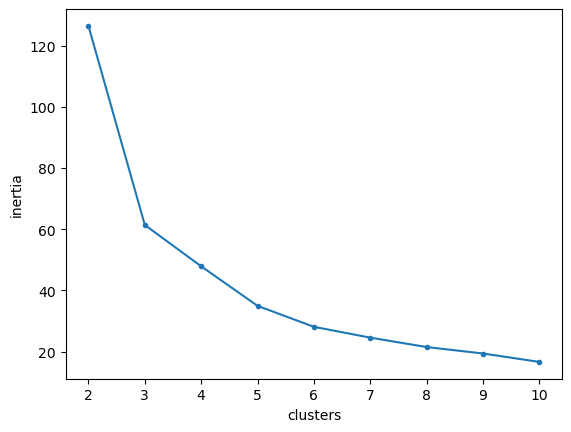

In [5]:
# Create an empty list of inertias
inertias = []
# Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    
# Visualize scores
plt.plot(range(2,11), inertias, marker='.')
plt.xlabel('clusters')
plt.ylabel('inertia')

In the above line plot, we see that the graph starts to level off at clusters. This looks similar to the bend in an arm which is why it is called the "elbow". Thus, 3 would be one candidate for a good number of clusters.

Remember, of course, that the best way to determine good clustering is to explore the clusters and consult a subject matter expert.

# Silhouette Score for KMeans

Another way to evaluate our clusters is to use the Silhouette Coefficient (commonly referred to as the Silhouette Score). The Silhouette Score is a measurement that takes into account both: how tight and how well-separated each cluster is. It dies this by calculating the distance between each data point and all other data points in that same cluster and by calculating the distance between each data point and the points in the new closest cluster. The best score is 1 (signaling well-defined & well-separated clusters) and the worst is -1.

From the [Scikit-Learn documentation for silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

The silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient fro a sample is **(b - a) / max(a, b)**. To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if the number of labels is 2 <= n_labels <= n_samples - 1.

Text(0, 0.5, 'Silhouette Score')

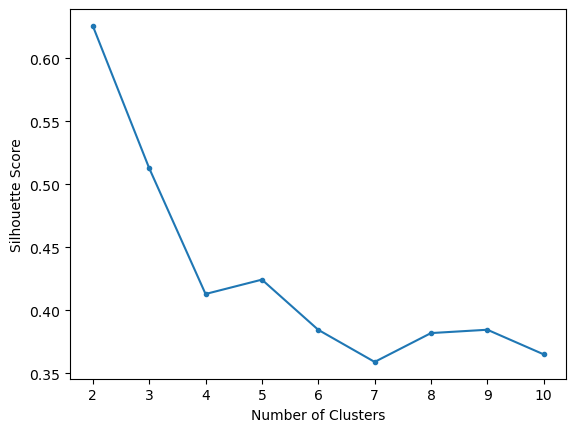

In [7]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2,11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

Based on the plot above, what is the best number of clusters for this data? (Remember that higher silhouette scores are better!)

We can see from the plot above that 2 would be the best number of clusters for our data since it has the highest Silhouette score.

In [8]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.6256358724826118

For this example, the Silhouette Score gives us a different suggestion for clustering than the elbow plot of inertia s. Remember, there is no clear-cut way to determine the nest number of clusters. Let's visualize both 2 and 3 clusters to see if we can determine the best clustering visually.

In [9]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

C:\Users\zachd\AppData\Local\Temp\ipykernel_18588\4089211224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster2'] = kmeans2.labels_
C:\Users\zachd\AppData\Local\Temp\ipykernel_18588\4089211224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster3'] = kmeans3.labels_


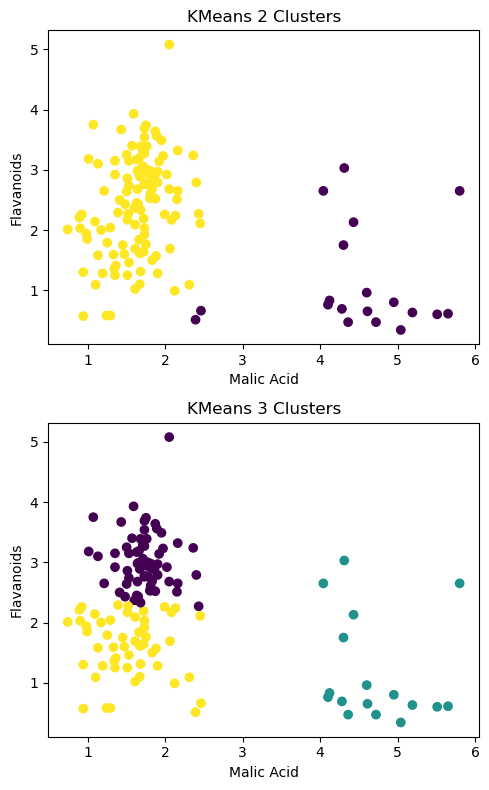

In [11]:
# Save the cluster labels to the dataframe
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['malic_acid'], df['flavanoids'], c=df['cluster2'])
axes[0].set_xlabel('Malic Acid')
axes[0].set_ylabel('Flavanoids')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['malic_acid'], df['flavanoids'], c=df['cluster3'])
axes[1].set_xlabel('Malic Acid')
axes[1].set_ylabel('Flavanoids')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

Which clustering looks best to you?